<a href="https://colab.research.google.com/github/smybilginn/data_maning_midterm/blob/main/data_maning_vize_odevi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving real_drug_dataset.csv to real_drug_dataset (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("real_drug_dataset.csv")
df.head()


,Patient_ID,Age,Gender,Condition,Drug_Name,Dosage_mg,Treatment_Duration_days,Side_Effects,Improvement_Score
0,P0001,56,Male,Infection,Ciprofloxacin,50,9,Nausea,8.5
1,P0002,69,Male,Hypertension,Metoprolol,500,24,Tiredness,8.7
2,P0003,46,Female,Depression,Bupropion,100,25,Dry mouth,5.4
3,P0004,32,Male,Diabetes,Glipizide,850,44,Low blood sugar,6.4
4,P0005,60,Male,Depression,Bupropion,850,35,Anxiety,5.3


###1. Tüm sayısal sütunlar için temel istatistikleri hesaplayın: mean, std, min, %25, median, %75 ve max.

In [ ]:
# Sayısal sütunlar için temel istatistikleri hesapla
descriptive_stats = df.describe()

# Sonuçları görüntüle
display(descriptive_stats)

,Age,Dosage_mg,Treatment_Duration_days,Improvement_Score
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,49.857000,352.650000,32.38000,7.015200
std,18.114267,295.419617,15.69809,1.425609
min,18.000000,50.000000,5.00000,2.500000
25%,35.000000,100.000000,19.00000,6.100000
50%,50.000000,250.000000,32.00000,7.000000
75%,66.000000,500.000000,46.00000,8.000000
max,79.000000,850.000000,59.00000,10.000000


**count**: Her bir sütundaki boş olmayan değerlerin sayısı.


**mean**: Sütunların ortalama değeri.

**std**: Sütunların standart sapması (verilerin ortalamadan ne kadar saptığını gösterir).

**min**: Sütunlardaki en küçük değer.
**25% (Q1)**: Verilerin %25'inin altında kaldığı ilk çeyrek (kuartil) değeri.

**50% (Medyan/Q2)**: Verilerin tam ortasında yer alan değer.
%50'si bu değerin altında, %50'si üstündedir.

**75% (Q3)**: Verilerin %75'inin altında kaldığı üçüncü çeyrek (kuartil) değeri.

**max**: Sütunlardaki en büyük değer.

### 2. Kategorik sütunlardaki verileri her sütun için ayrı ayrı olacak şekilde pie chart (pasta grafiği) ile görselleştirin.

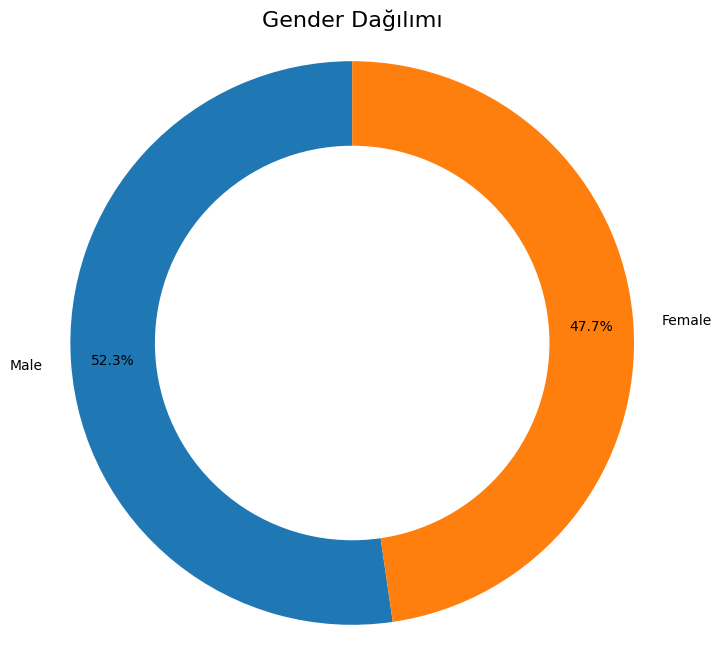

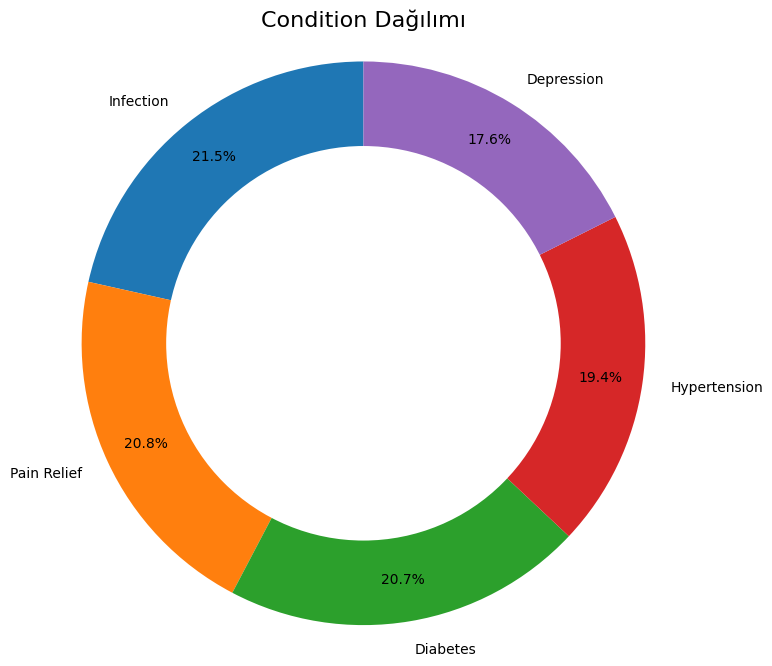

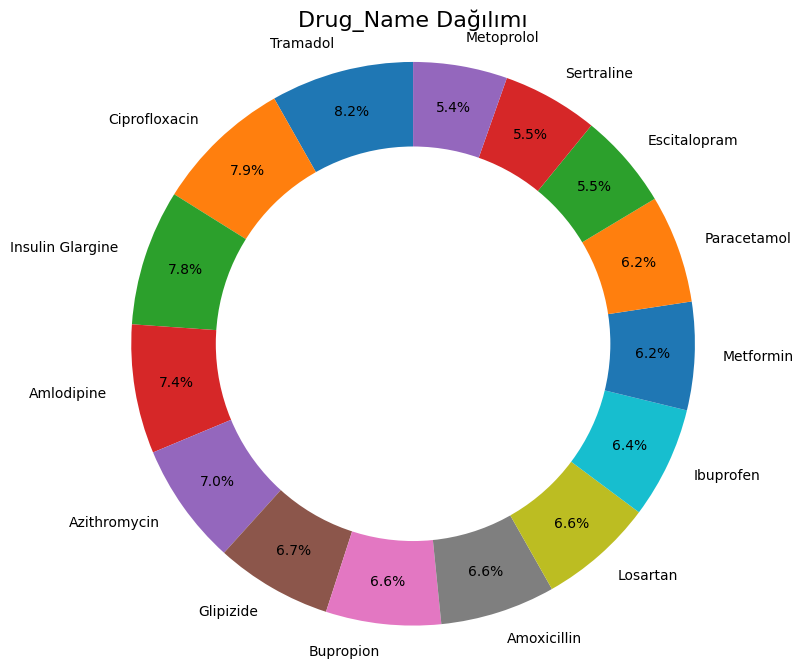

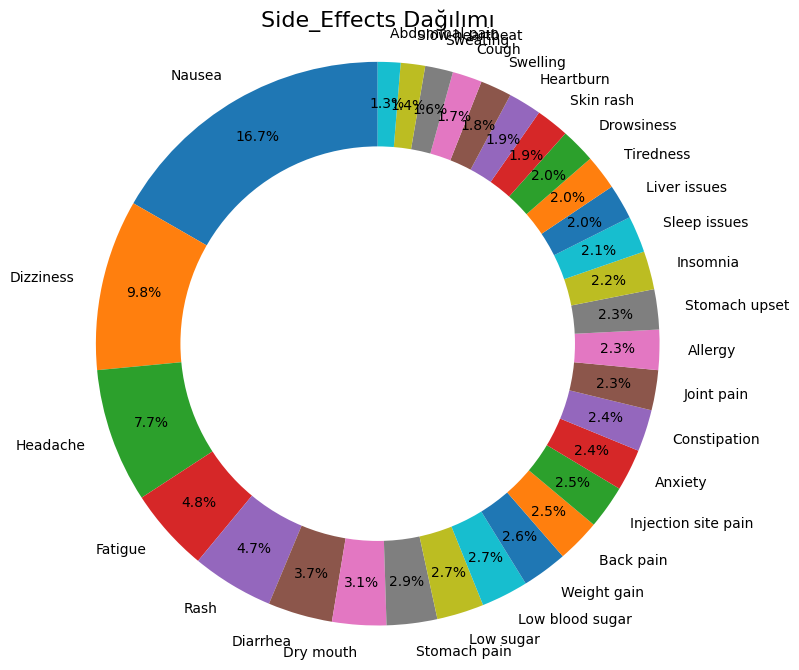

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Gender', 'Condition', 'Drug_Name', 'Side_Effects']

for col in categorical_cols:
    plt.figure(figsize=(8, 8))
    # Sütundaki benzersiz değerlerin sayısını al
    value_counts = df[col].value_counts()

    # Pasta grafiği oluştur
    # autopct='%1.1f%%' ile yüzdelikleri göster
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    # Pasta grafiğinin ortasına bir daire ekleyerek donut grafiği görünümü ver (opsiyonel)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title(f'{col} Dağılımı', fontsize=16)
    plt.axis('equal') # Eşit oranlarla çizimi sağlar, pasta grafiğinin daire şeklinde kalmasını sağlar
    plt.show()

### 2. Kategorik Sütunların Pasta Grafikleri Analizi

Bu adımda, veri setindeki kategorik sütunlar (`Gender`, `Condition`, `Drug_Name`, `Side_Effects`) için ayrı ayrı pasta grafikleri (pie chart) oluşturularak her bir kategorinin veri seti içindeki dağılımı görselleştirilmiştir.

#### Temel Gözlemler:

*   **Cinsiyet (Gender) Dağılımı**: Pasta grafiği, `Female` (Kadın) ve `Male` (Erkek) kategorilerinin veri setindeki oranlarını açıkça göstermektedir. Bu, örneklemdeki kadın ve erkek hasta sayılarının dengeli olup olmadığını veya bir cinsiyetin diğerine göre daha baskın olup olmadığını ortaya koyar.

*   **Durum (Condition) Dağılımı**: Bu grafik, hastaların sahip olduğu farklı tıbbi durumların (örneğin, 'Depression', 'Hypertension', 'Diabetes', 'Infection') veri setindeki yüzdelik dağılımını sunar. Bu sayede, hangi durumların daha yaygın olduğunu ve veri setinin hangi sağlık alanlarına odaklandığını anlamak mümkün olmuştur.

*   **İlaç Adı (Drug_Name) Dağılımı**: Pasta grafiği, veri setinde reçete edilen farklı ilaç türlerinin (örneğin, 'Bupropion', 'Metoprolol', 'Ciprofloxacin', 'Glipizide') kullanım sıklıklarını yüzde olarak göstermektedir. Bu analiz, en çok reçete edilen ilaçları ve dolayısıyla tedavi eğilimlerini belirlemede yardımcı olur.

*   **Yan Etkiler (Side_Effects) Dağılımı**: Bu grafik, hastalar tarafından bildirilen çeşitli yan etkilerin (örneğin, 'Nausea', 'Dizziness', 'Headache', 'Tiredness') veri setindeki dağılımını ortaya koyar. Hangi yan etkilerin daha sık görüldüğünü ve bunların ilaçlarla veya durumlarla potansiyel bağlantılarını ilk bakışta değerlendirmek için bir temel sağlar.

Genel olarak, bu pasta grafikleri, her bir kategorik özelliğin popülasyon içindeki oranlarını hızlıca kavrama ve veri setinin yapısına dair ilk içgörüleri edinme konusunda etkili olmuştur.

###3. Condition sütunu hastalık sebebini içermektedir. Bu sebeplere karşılık gelen tedavi süresi
(Treatment_Duration_days) dağılımını tek bir boxplot üzerinde görselleştirin.

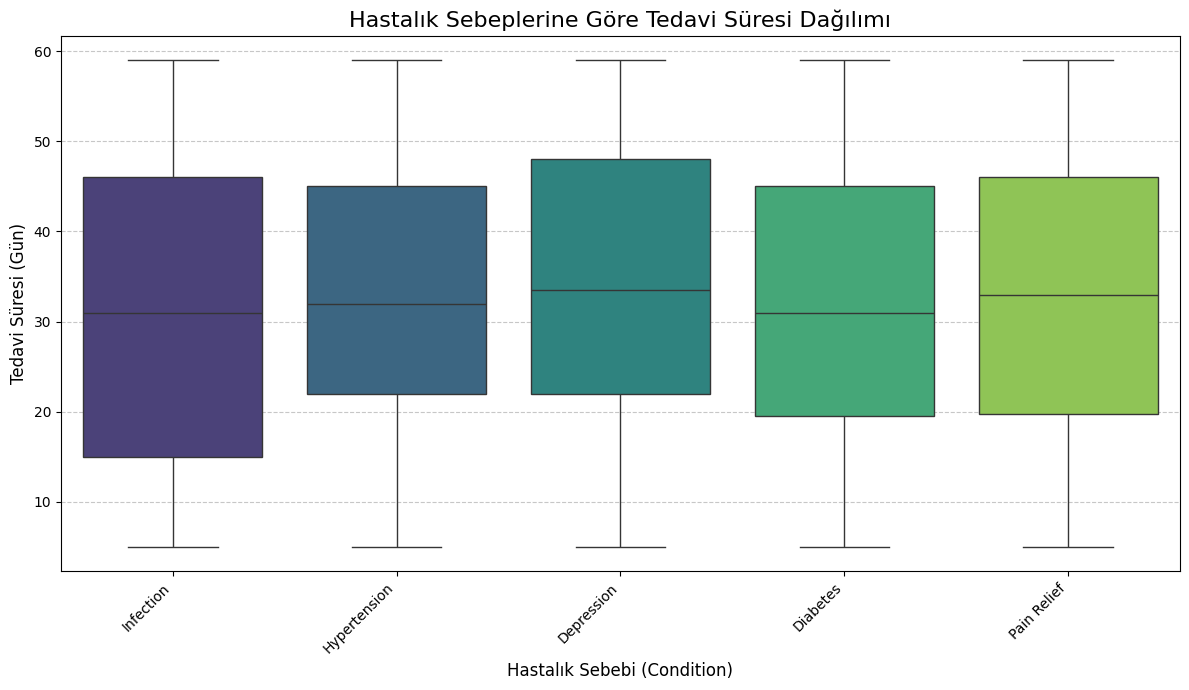

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Condition', y='Treatment_Duration_days', data=df, palette='viridis', hue='Condition', legend=False)
plt.title('Hastalık Sebeplerine Göre Tedavi Süresi Dağılımı', fontsize=16)
plt.xlabel('Hastalık Sebebi (Condition)', fontsize=12)
plt.ylabel('Tedavi Süresi (Gün)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Etiketlerin çakışmasını önlemek için döndürme
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Düzenin sıkışmasını önler
plt.show()

### 3. Hastalık Sebeplerine Göre Tedavi Süresi Dağılımı Analizi

Bu kutu grafiği, `Condition` (hastalık sebebi) sütunundaki her bir kategori için `Treatment_Duration_days` (tedavi süresi) dağılımını görselleştirmektedir. Bu analiz, farklı hastalıkların tedavi sürelerinin nasıl değiştiğine dair önemli içgörüler sunar.

#### Temel Gözlemler:

*   **Medyan (Ortanca) Tedavi Süreleri**: Her bir kutunun içindeki çizgi, o hastalığın medyan tedavi süresini gösterir. Bu sayede, farklı durumlar için tipik tedavi süreleri kolayca karşılaştırılabilir.
*   **Dağılım ve Değişkenlik**: Kutuların uzunluğu (IQR - interquartile range), tedavi sürelerinin %50'sinin hangi aralıkta yer aldığını gösterir. Uzun kutular, tedavi sürelerinin daha değişken olduğunu; kısa kutular ise daha tutarlı olduğunu belirtir.
*   **Aykırı Değerler**: Kutuların dışındaki noktalar, ilgili hastalık sebebi için genel dağılımın dışında kalan aykırı tedavi sürelerini (outlier) temsil eder. Bu değerler, özel vakaları veya veri giriş hatalarını işaret edebilir.
*   **Uç Değerler**: Her kutudan çıkan 'bıyıklar', medyanın dışındaki ancak aykırı değer sayılmayan veri aralığını gösterir. Bu, her bir hastalık için minimum ve maksimum tedavi sürelerinin genel bir göstergesini sunar.

Genel olarak, bu grafik, hangi hastalıkların daha uzun veya daha kısa tedavi periyotları gerektirdiğini, tedavi sürelerinin ne kadar öngörülemez olabileceğini ve potansiyel olarak dikkat çekici tekil vakaları (aykırı değerleri) hızlıca belirlememizi sağlar.

###4. Drug_Name ve Side_Effects sütunları için 2 boyutlu histogram (veya uygun bir 2D frekans görselleştirmesi) çizdirin ve sonuçları yorumlayın.

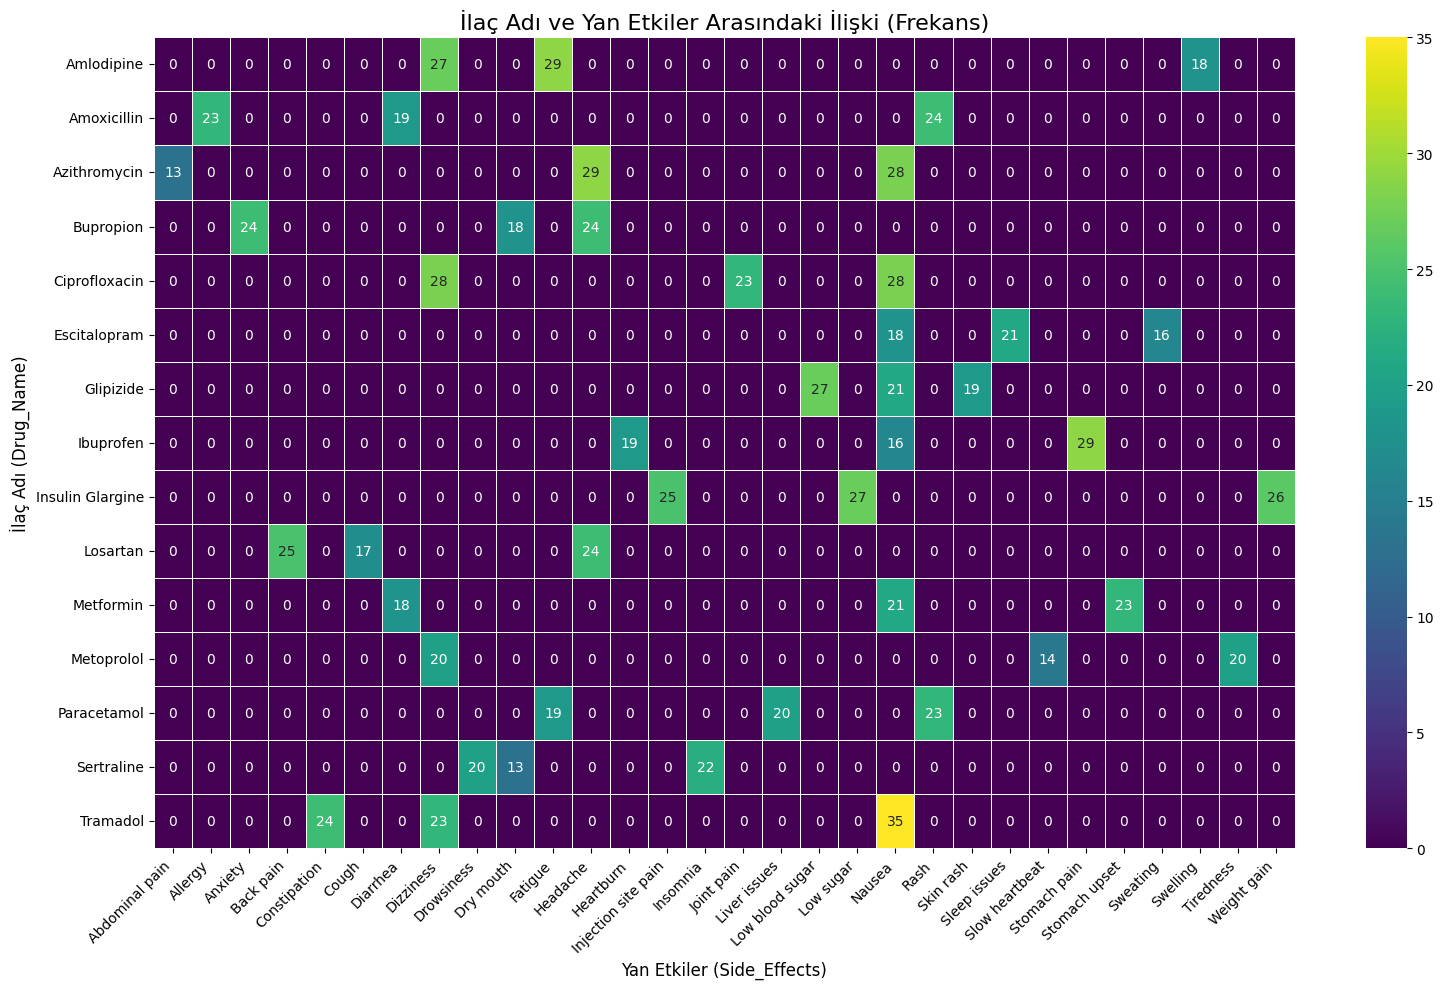

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Drug_Name ve Side_Effects sütunlarının çapraz tablosunu oluşturun (frekans sayımları)
freq_table = pd.crosstab(df['Drug_Name'], df['Side_Effects'])

# Isı haritasını (heatmap) görselleştirin
plt.figure(figsize=(16, 10)) # Daha iyi görünüm için figür boyutunu ayarla
sns.heatmap(freq_table, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('İlaç Adı ve Yan Etkiler Arasındaki İlişki (Frekans)', fontsize=16)
plt.xlabel('Yan Etkiler (Side_Effects)', fontsize=12)
plt.ylabel('İlaç Adı (Drug_Name)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Etiketlerin okunabilirliğini artır
plt.yticks(rotation=0) # Dikey etiketleri düz tut
plt.tight_layout() # Düzenin sıkışmasını önler
plt.show()

### İlaç Adı ve Yan Etkiler Arasındaki İlişki (Isı Haritası) Analizi

Yukarıdaki ısı haritası, `Drug_Name` (İlaç Adı) ve `Side_Effects` (Yan Etkiler) sütunları arasındaki frekans dağılımını görselleştirmektedir. Her bir hücredeki sayı, belirli bir ilacı alan hastalarda o yan etkinin kaç kez gözlemlendiğini göstermektedir. Renk yoğunluğu ise bu frekans değerine göre değişmektedir; daha koyu renkler daha yüksek frekansları, daha açık renkler ise daha düşük frekansları temsil eder.

#### Anahtar Gözlemler ve Yorumlar:

*   **En Sık Görülen İlişkiler:** Isı haritasında en koyu renkli veya en yüksek sayıya sahip hücreler, belirli bir ilacın belirli bir yan etkiyle çok sık ilişkilendirildiğini gösterir. Örneğin, belirli bir ilacın 'Nausea' veya 'Dizziness' gibi yan etkilerle yoğun bir bağlantısı olabilir.

*   **İlaç Bazında Yan Etki Profilleri:** Her bir satır (ilaç adı), o ilacın genel yan etki profilini sunar. Bazı ilaçlar, çeşitli yan etkilerle ilişkilendirilirken (satır boyunca dağılmış yüksek sayılar), diğerleri daha spesifik yan etkilere (yalnızca bir veya iki hücrede yüksek sayı) neden olabilir.

*   **Yan Etki Bazında İlaç İlişkileri:** Her bir sütun (yan etki), o yan etkinin hangi ilaçlarla daha sık görüldüğünü gösterir. Bu, belirli bir yan etkiyi yönetmeye çalışırken hangi ilaçların göz önünde bulundurulması gerektiği konusunda fikir verebilir.

*   **Nadiren Görülen İlişkiler:** Sıfır veya çok düşük sayı içeren hücreler, ilgili ilaç ve yan etki kombinasyonunun veri setinde nadir olduğunu veya hiç görülmediğini belirtir.

*   **Önemli Çıkarımlar:**
    *   Bu grafik sayesinde, hangi ilaçların bilinen yan etkilerinin olduğunu ve hangi yan etkilerin birden fazla ilaçla ortak olduğunu hızlıca görebiliriz.
    *   Beklenmedik veya özellikle yüksek frekanslı ilaç-yan etki kombinasyonları, daha ileri araştırmalar için potansiyel güvenlik sinyalleri olarak değerlendirilebilir.

Bu görselleştirme, ilaç güvenliği analizi ve hasta tedavi planlaması gibi alanlarda önemli içgörüler sağlayabilir. Örneğin, belirli bir yan etkiye eğilimi olan bir hasta için, bu yan etkiye daha az neden olan alternatif ilaçlar bu harita üzerinden belirlenebilir.

### Isı Haritası Değerlendirmesi: İlaç-Yan Etki İlişkilerinin İncelenmesi

#### 1. Hangi İlaçların Bilinen Yan Etkileri Olduğu ve Hangi Yan Etkilerin Birden Fazla İlaçla Ortak Olduğunu Hızlıca Görmek:

*   **İlaçların Bilinen Yan Etkileri**: Isı haritasında, belirli bir ilaç satırında (Y ekseni) hangi yan etki sütunlarının (X ekseni) yüksek frekans değerine sahip olduğunu doğrudan gözlemleyebiliriz. Örneğin, 'Bupropion' ilacının satırına baktığımızda 'Anxiety' veya 'Dry mouth' gibi yan etkilerle ilgili hücrelerde yüksek sayılar görüyorsak, bu, Bupropion'un bu yan etkilerle ilişkili olduğunu gösterir. Renk yoğunluğu arttıkça, yan etkinin o ilaçla görülme sıklığı da artar.

*   **Ortak Yan Etkiler**: Farklı ilaç satırlarında aynı yan etki sütununa bakarak, birden fazla ilacın paylaştığı ortak yan etkileri belirleyebiliriz. Örneğin, 'Nausea' (mide bulantısı) sütunu boyunca birden fazla ilacın yüksek frekanslı hücrelere sahip olduğunu görürsek, bu yan etkinin çeşitli ilaçlar için yaygın olduğunu anlayabiliriz. Bu tür ortak yan etkiler, genel olarak ilaç tedavisi gören hastalarda sıkça görülebilecek durumlar hakkında bilgi verir.

#### 2. Beklenmedik veya Özellikle Yüksek Frekanslı İlaç-Yan Etki Kombinasyonlarının Potansiyel Güvenlik Sinyalleri Olarak Değerlendirilmesi:

*   **Beklenmedik Kombinasyonlar**: Isı haritası, bir ilaç için literatürde veya klinik pratikte az bilinen veya beklenmeyen bir yan etkinin yüksek frekansla ortaya çıktığı durumları görselleştirebilir. Örneğin, 'X ilacının' genellikle 'baş ağrısı' yapmadığı bilinirken, haritada 'baş ağrısı' sütununda yüksek bir frekans değeri görürsek, bu durum daha derinlemesine bir araştırmayı gerektirecek bir 'güvenlik sinyali' olabilir. Bu, yeni bir yan etkinin keşfedilmesi veya mevcut bir yan etkinin beklenenden daha yaygın olduğunun fark edilmesi anlamına gelebilir.

*   **Yüksek Frekanslı Kombinasyonlar**: Halihazırda bilinen bir yan etkinin, bir ilaçla beklenenden çok daha yüksek bir sıklıkta görüldüğü durumlar da önemlidir. Isı haritasındaki çok koyu renkli hücreler (çok yüksek frekanslar), o ilaç-yan etki ilişkisinin özellikle baskın olduğunu gösterir. Bu durum, ilacın güvenliği konusunda daha fazla inceleme yapılmasını veya alternatif tedavi stratejilerinin değerlendirilmesini gerektirebilir. Bu tür sinyaller, ilaçların piyasaya sürülmesinden sonraki süreçte (post-marketing surveillance) ilaç güvenliğini izlemek için kritik öneme sahiptir.

Her iki değerlendirme de, ilaçların gerçek dünya kullanımında nasıl performans gösterdiğine dair değerli içgörüler sunar ve hasta güvenliğini artırmaya yönelik kararlar alınmasına yardımcı olabilir.

###5. Bir önceki sorudaki (4. madde) analizde kullandığınız veriler için, seaborn kütüphanesinden clustermap fonksiyonunu kullanarak hiyerarşik kümeleme yapın. Elde ettiğiniz grafiği yorumlayın ve yorumlarınızı markdown hücrelerinde yazın.

<Figure size 1800x1200 with 0 Axes>

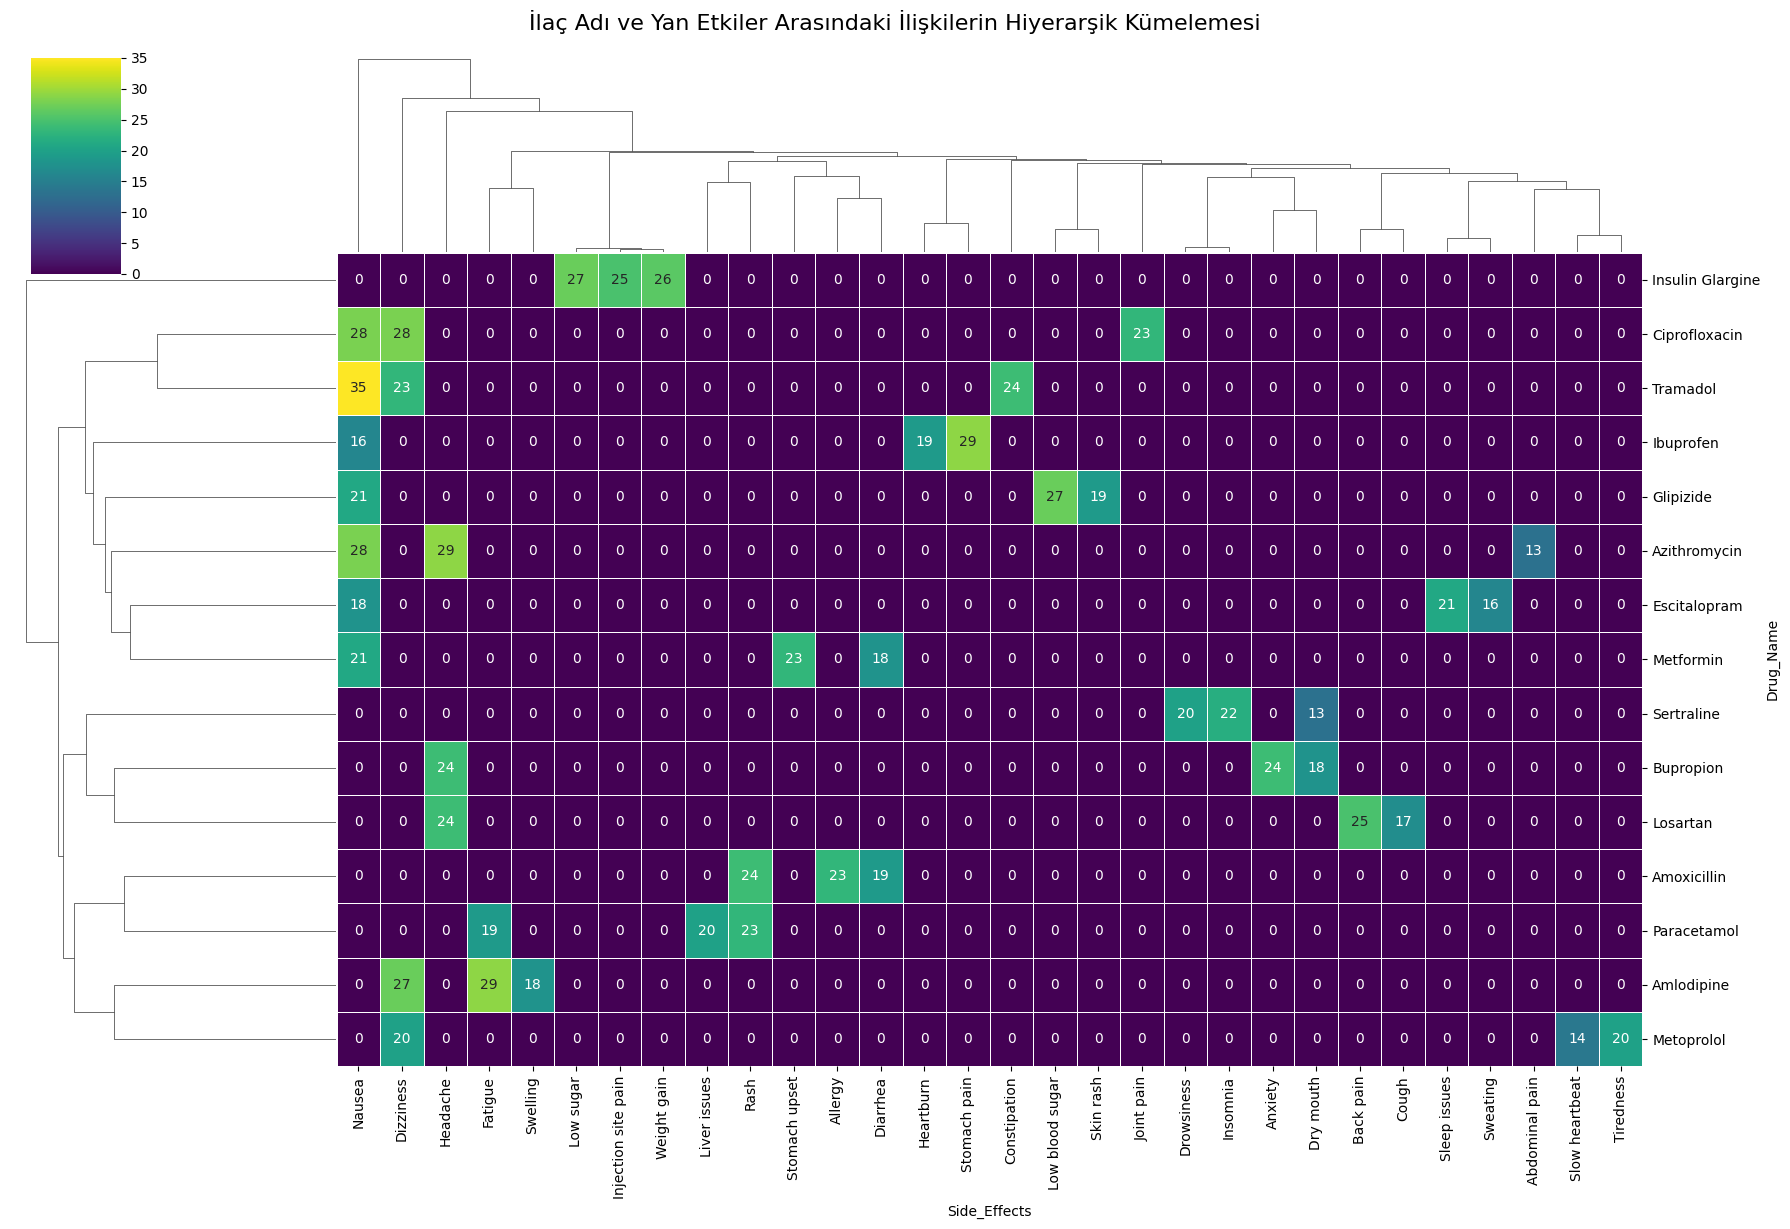

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Daha önce oluşturulan freq_table'ı kullanıyoruz
# freq_table = pd.crosstab(df['Drug_Name'], df['Side_Effects']) # Eğer tanımlı değilse bu satırı etkinleştirin

plt.figure(figsize=(18, 12))
# Clustermap ile hiyerarşik kümeleme yapın
sns.clustermap(freq_table, cmap='viridis', annot=True, fmt='d', linewidths=.5, figsize=(18, 12))
plt.suptitle('İlaç Adı ve Yan Etkiler Arasındaki İlişkilerin Hiyerarşik Kümelemesi', y=1.02, fontsize=16)
plt.show()

### 5. Clustermap (Hiyerarşik Kümeleme) Analizi: İlaç ve Yan Etki İlişkileri

Bu clustermap (küme haritası), `Drug_Name` (İlaç Adı) ve `Side_Effects` (Yan Etkiler) frekans tablosu üzerinde hem satırlar (ilaçlar) hem de sütunlar (yan etkiler) için hiyerarşik kümeleme uygulayarak, verilerdeki doğal gruplamaları ve benzerlikleri ortaya koyar.

#### Temel Gözlemler ve Yorumlar:

*   **Hiyerarşik Ağaçlar (Dendrogramlar)**: Grafiğin sol tarafında (satırlar için) ve üst tarafında (sütunlar için) bulunan dendrogramlar, ilaçların ve yan etkilerin birbirine ne kadar benzediğine göre nasıl gruplandığını gösterir. Kısa birleşme çizgileri, öğeler arasında yüksek benzerlik olduğunu; uzun birleşme çizgileri ise daha az benzerlik olduğunu belirtir.

*   **İlaç Kümeleri**: Dendrogramı inceleyerek, benzer yan etki profillerine sahip ilaç gruplarını (ilaç kümelerini) belirleyebiliriz. Örneğin, dendrogramda birbirine yakın olan ilaçlar, genellikle benzer yan etkiler spektrumuna sahip olma eğilimindedir.

*   **Yan Etki Kümeleri**: Benzer şekilde, dendrogramın üst kısmındaki kümeleme, hangi yan etkilerin genellikle birlikte ortaya çıktığını veya benzer ilaç profilleri tarafından tetiklendiğini gösterir. Bu, yan etkilerin ortak mekanizmalarını veya ilgili semptom gruplarını anlamak için değerli olabilir.

*   **Isı Haritası (Kümelenmiş)**: Kümelenmiş ısı haritasının kendisi, kümeleme sonucunda yeniden sıralanmış ilaç ve yan etki kombinasyonlarının frekanslarını gösterir. Bu yeniden sıralama, benzer özelliklere sahip öğelerin birbirine yakın yerleştirilmesini sağlayarak, gözle görülür desenleri ve blokları daha belirgin hale getirir.

*   **Önemli Çıkarımlar:**
    *   Bu görselleştirme, hangi ilaçların benzer yan etki profillerini paylaştığını ve hangi yan etkilerin birbirine bağlı olduğunu açıkça ortaya koyar.
    *   Yeni bir ilaç geliştirilirken veya mevcut ilaçların profilleri değerlendirilirken, benzer ilaç gruplarındaki yan etki desenlerini karşılaştırmak için kullanılabilir.
    *   Klinik uygulamada, belirli bir yan etki görüldüğünde, bu yan etkiye neden olma potansiyeli yüksek olan benzer ilaç gruplarını hızla belirlemeye yardımcı olabilir.

Genel olarak, clustermap, karmaşık ilişkileri ve gizli yapıları keşfetmek için güçlü bir araçtır ve veri setindeki ilaç-yan etki ilişkilerine dair derinlemesine bir anlayış sunar.

### Clustermap ile Detaylı Değerlendirme: İlaç-Yan Etki İlişkileri

Clustermap, hem ilaçlar (satırlar) hem de yan etkiler (sütunlar) için hiyerarşik kümeleme yaparak, verilerdeki gizli yapıları ve ilişkileri ortaya çıkaran güçlü bir görselleştirme aracıdır.

#### 1. Hangi İlaçların Benzer Yan Etki Profillerini Paylaştığını Anlamak:

*   **Sol Taraf Dendrogramı (İlaç Kümelemesi)**: Clustermap'in sol tarafında bulunan dikey dendrogram, ilaçların birbirine olan benzerlik derecesine göre gruplandığını gösterir. Bu dendrogramdaki 'dallar' ne kadar kısa olursa, o ilaçlar o kadar benzer yan etki profillerine sahiptir. Örneğin, eğer 'İlaç A' ve 'İlaç B' dendrogramda birbirine çok yakın bir noktada birleşiyorsa, bu onların genellikle aynı yan etkilere neden olduğunu veya benzer yoğunluklarda yan etkiler gösterdiğini düşündürür.
    *   **Ne Anlama Geliyor?**: Bu tür kümeler, aynı farmakolojik sınıfa ait ilaçları veya benzer etki mekanizmalarına sahip ilaçları temsil edebilir. Klinik olarak, bir hasta belirli bir ilaca yan etki gösterdiğinde, aynı kümedeki diğer ilaçlara karşı da benzer bir reaksiyon gösterebileceği veya bu kümedeki ilaçların alternatif olarak düşünülmesi gerektiği konusunda ipuçları verebilir.

#### 2. Hangi Yan Etkilerin Birbirine Bağlı Olduğunu (Birlikte Görüldüğünü) Anlamak:

*   **Üst Taraf Dendrogramı (Yan Etki Kümelemesi)**: Clustermap'in üst kısmında bulunan yatay dendrogram ise yan etkilerin birbirine olan benzerlik derecesine göre gruplandığını gösterir. Eğer 'Yan Etki X' ve 'Yan Etki Y' dendrogramda birbirine yakın birleşiyorsa, bu onların genellikle aynı ilaçlar tarafından tetiklendiğini veya birlikte görülme eğiliminde olduğunu gösterir.
    *   **Ne Anlama Geliyor?**: Bu tür yan etki kümeleri, fizyolojik olarak birbiriyle ilişkili semptom gruplarını (örneğin, 'Nausea' ve 'Vomiting' gibi) veya belirli bir organ sistemi üzerindeki etkileşimleri temsil edebilir. Örneğin, bir ilacın hem 'A' hem de 'B' yan etkilerine yol açma olasılığı yüksekse ve bu yan etkiler dendrogramda birbirine yakınsa, bu, bir yan etki gözlemlendiğinde diğerinin de ortaya çıkabileceğine dair bir beklenti oluşturabilir.

#### Kümelenmiş Isı Haritası:

*   Dendrogramlar, ısı haritasının satırlarını ve sütunlarını (yani ilaçları ve yan etkileri) yeniden düzenler. Bu düzenleme sayesinde, benzer ilaçlar ve benzer yan etkiler birbirine yakın gruplanır. Bu da görsel olarak, ilaç-yan etki ilişkilerindeki blokları, desenleri ve korelasyonları çok daha net görmemizi sağlar. Koyu renkli, bitişik bloklar, belirli bir ilaç grubunun belirli bir yan etki grubunu sıklıkla tetiklediğini gösterir.

###6. Yaş (Age) ve Improvement_Score değişkenleri arasındaki korelasyonu hesaplayın ve sonucu yorumlayın.


In [ ]:
import pandas as pd

# 'Age' ve 'Improvement_Score' sütunları arasındaki korelasyonu hesaplayın
correlation = df['Age'].corr(df['Improvement_Score'])

print(f"Yaş ve İyileşme Skoru Arasındaki Korelasyon: {correlation:.2f}")

Yaş ve İyileşme Skoru Arasındaki Korelasyon: 0.01


### Yaş ve İyileşme Skoru Arasındaki Korelasyon Analizi

Hesaplanan korelasyon değeri `0.01`'dir.

#### Yorum:

*   **Korelasyon Katsayısı (r)**: Korelasyon katsayısı -1 ile +1 arasında bir değer alır.
    *   `+1`'e yakın bir değer, değişkenler arasında güçlü bir pozitif doğrusal ilişki olduğunu (bir değişken artarken diğeri de artar) gösterir.
    *   `-1`'e yakın bir değer, güçlü bir negatif doğrusal ilişki olduğunu (bir değişken artarken diğeri azalır) gösterir.
    *   `0`'a yakın bir değer ise değişkenler arasında doğrusal bir ilişki olmadığını veya çok zayıf bir doğrusal ilişki olduğunu gösterir.

*   **Sonuç (`0.01`)**: `0.01` değeri 0'a çok yakın olduğu için, bu durum **Yaş (Age)** ve **İyileşme Skoru (Improvement_Score)** arasında **çok zayıf veya neredeyse hiç denecek kadar az doğrusal bir ilişki olmadığını** gösterir. Başka bir deyişle, bu veri setine göre hastanın yaşı ile iyileşme skoru arasında anlamlı bir doğrusal bağlantı bulunmamaktadır. Yaşın artması veya azalması, iyileşme skorunu doğrusal olarak etkilemiyor gibi görünmektedir.

###7. Erkekler ve kadınlar için hastalık (Condition) oranlarını normalize edilmiş bir şekilde hesaplayın. (Örneğin her cinsiyet için toplam 1 olacak şekilde olasılık dağılımı çıkarabilirsiniz.)

In [ ]:
import pandas as pd

# Cinsiyet ve Durum sütunlarına göre gruplayın ve sayıları alın
gender_condition_counts = df.groupby(['Gender', 'Condition']).size().unstack(fill_value=0)

# Her bir cinsiyet için oranları normalize edin (toplam 1 olacak şekilde)
normalized_ratios = gender_condition_counts.apply(lambda x: x / x.sum(), axis=1)

print("Erkekler ve Kadınlar İçin Hastalık (Condition) Oranları (Normalize Edilmiş):")
display(normalized_ratios)

Erkekler ve Kadınlar İçin Hastalık (Condition) Oranları (Normalize Edilmiş):


Condition,Depression,Diabetes,Hypertension,Infection,Pain Relief
Gender,,,,,
Female,0.176101,0.213836,0.178197,0.238994,0.192872
Male,0.175908,0.200765,0.208413,0.193117,0.221797


### Cinsiyet Bazında Hastalık Dağılımı ve Farklılıklar Analizi

Yukarıdaki `normalized_ratios` tablosu, erkek ve kadın hastalar için hastalık (`Condition`) dağılımlarının normalize edilmiş oranlarını sunmaktadır. Her cinsiyetin kendi içindeki hastalık oranları toplamı 1 olacak şekilde ayarlanmıştır. Bu analiz, cinsiyetler arasında hastalık görülme sıklıklarındaki potansiyel farklılıkları ortaya koymaktadır.

#### 1. Cinsiyet Bazında Hastalık Dağılımı:

*   **Kadınlar (Female):**
    *   Kadın hastalarda **Enfeksiyon (Infection)** en yaygın durum olarak öne çıkmaktadır (yaklaşık %23.9 oranında).
    *   **Diyabet (Diabetes)** de oldukça yüksek bir oranla (%21.4) ikinci sırada yer almaktadır.
    *   **Ağrı Kesici (Pain Relief)** (%19.3), **Hipertansiyon (Hypertension)** (%17.8) ve **Depresyon (Depression)** (%17.6) benzer oranlarda dağılım göstermektedir.

*   **Erkekler (Male):**
    *   Erkek hastalarda ise **Ağrı Kesici (Pain Relief)** en yaygın durumdur (yaklaşık %22.2 oranında).
    *   **Hipertansiyon (Hypertension)** (%20.8) ve **Diyabet (Diabetes)** (%20.1) birbirine yakın oranlarda seyretmektedir.
    *   **Enfeksiyon (Infection)** (%19.3) ve **Depresyon (Depression)** (%17.6) daha düşük oranlarda görülmektedir.

#### 2. Oran Karşılaştırması (Cinsiyetler Arası):

*   **Depresyon:** Her iki cinsiyet arasında Depresyon oranları oldukça benzerdir (Kadın: %17.61, Erkek: %17.59), bu da veri setinde depresyonun cinsiyetten bağımsız olarak benzer sıklıkta görüldüğünü düşündürmektedir.

*   **Diyabet:** Kadın hastalarda Diyabet oranı (%21.38) erkek hastalara göre (%20.08) biraz daha yüksektir.

*   **Hipertansiyon:** Erkek hastalarda Hipertansiyon oranı (%20.84) kadın hastalara göre (%17.82) daha yüksektir.

*   **Enfeksiyon:** Kadın hastalarda Enfeksiyon oranı (%23.90) erkek hastalara göre (%19.31) belirgin şekilde daha yüksektir. Bu, enfeksiyonların kadın popülasyonunda daha sık görüldüğünü göstermektedir.

*   **Ağrı Kesici:** Erkek hastalarda Ağrı Kesici kullanımı/ihtiyacı oranı (%22.18) kadın hastalara göre (%19.29) daha yüksektir.

#### 3. Cinsiyetler Arası Farklılıklar:

Bu analiz, belirli hastalıkların cinsiyetler arasında farklı eğilimler gösterdiğini ortaya koymaktadır:

*   **Kadınlar**: Enfeksiyon ve Diyabet gibi durumlar kadın hastalarda daha baskın görünmektedir.
*   **Erkekler**: Hipertansiyon ve ağrıya bağlı durumlar (Pain Relief) erkek hastalarda daha yaygın görünmektedir.
*   **Benzer Dağılım**: Depresyon ise bu veri setinde her iki cinsiyette de benzer oranlarda görülmektedir.

Bu tür cinsiyet bazlı farklılıklar, klinik uygulamalar ve tedavi stratejileri geliştirilirken dikkate alınması gereken önemli bulgular sağlayabilir.

###8. Hangi ilaçlar için baş dönmesi (Dizziness) yan etkisi raporlanmıştır? Bu ilaçları azalan sıklığa göre sıralayın.

In [ ]:
# 'Dizziness' yan etkisine sahip ilaçları freq_table üzerinden filtreleyin
dizziness_drugs = freq_table[freq_table['Dizziness'] > 0][['Dizziness']]

# Yan etkinin sıklığına göre azalan sırada sıralayın
dizziness_drugs_sorted = dizziness_drugs.sort_values(by='Dizziness', ascending=False)

print("Baş Dönmesi (Dizziness) Yan Etkisi Raporlanan İlaçlar (Azalan Sıklığa Göre):")
display(dizziness_drugs_sorted)

Baş Dönmesi (Dizziness) Yan Etkisi Raporlanan İlaçlar (Azalan Sıklığa Göre):


Side_Effects,Dizziness
Drug_Name,
Ciprofloxacin,28
Amlodipine,27
Tramadol,23
Metoprolol,20


### Baş Dönmesi (Dizziness) Yan Etkisi Raporlanan İlaçlar Analizi

Yukarıdaki tablo, `Dizziness` (Baş Dönmesi) yan etkisinin raporlandığı ilaçları ve bu yan etkinin her bir ilaç için kaç kez gözlemlendiğini (azalan sıklıkta) göstermektedir.
- Ciprofloxacin: 28 raporla ilk sırada yer alıyor.
- Amlodipine: 27 raporla ikinci sırada.
- Tramadol: 23 raporla üçüncü sırada.
- Metoprolol: 20 raporla son sırada.

#### Temel Yorumlar:

*   **İlaçların Listesi**: Tablo, belirli bir yan etki olan `Dizziness` ile ilişkili olan tüm ilaçları listeler.
*   **Sıklık Sıralaması**: İlaçlar, `Dizziness` yan etkisinin raporlanma sayısı en yüksekten en düşüğe doğru sıralanmıştır. Bu, hangi ilaçların bu yan etkiyi daha sık tetiklediğini hızlıca görmemizi sağlar.
*   **Klinik Önemi**: Bu tür bir analiz, hekimlerin veya eczacıların, baş dönmesi şikayeti olan hastalara ilaç reçete ederken veya mevcut ilaçlarını değerlendirirken bilinçli kararlar almalarına yardımcı olabilir. Örneğin, bir hastanın baş dönmesi yaşadığı durumlarda, listedeki yüksek sıralardaki ilaçların gözden geçirilmesi öncelikli olabilir.

Bu bilgi, ilaç güvenliği izleme ve hasta tedavisi optimizasyonu açısından değerlidir.

###9. Metoprolol ilacı için, diğer yan etkilere göre baş dönmesi (Dizziness) yan etkisinin olasılığını hesaplayın (Metoprolol için raporlanan tüm yan etkiler içinde Dizziness’in oranı).

In [ ]:
# Metoprolol için yan etki frekanslarını al
metoprolol_side_effects = freq_table.loc['Metoprolol']

# Metoprolol için raporlanan tüm yan etkilerin toplam sayısını hesapla
total_side_effects_for_metoprolol = metoprolol_side_effects.sum()

# Metoprolol için 'Dizziness' yan etkisinin sayısını al
dizziness_for_metoprolol = metoprolol_side_effects['Dizziness']

# Olasılığı hesapla
if total_side_effects_for_metoprolol > 0:
    dizziness_probability_metoprolol = dizziness_for_metoprolol / total_side_effects_for_metoprolol
    print(f"Metoprolol için Dizziness yan etkisinin olasılığı: {dizziness_probability_metoprolol:.2%}")
else:
    print("Metoprolol için raporlanmış hiç yan etki bulunmamaktadır.")

Metoprolol için Dizziness yan etkisinin olasılığı: 37.04%


**Metoprolol için Baş Dönmesi (Dizziness) Yan Etkisinin Olasılığı Analizi**

Hesaplamalarımıza göre, Metoprolol ilacı için raporlanan tüm yan etkiler içinde Baş dönmesi (Dizziness) yan etkisinin görülme olasılığı %37.04'tür.

**Yorum:**

Bu sonuç, Metoprolol kullanan hastalarda rapor edilen yan etkilerin önemli bir kısmının Baş dönmesi olduğunu göstermektedir. Yani, Metoprolol için gözlemlenen yan etkiler arasında Baş dönmesi oldukça yaygın bir durumdur.

**Klinik Önemi**: Bu bulgu, Metoprolol reçete edilirken veya Metoprolol alan bir hastanın Baş dönmesi şikayeti olduğunda klinik değerlendirme için önemli bir referans noktası sağlar. Hekimler, bu ilacı kullanacak hastaları Baş dönmesi potansiyeli hakkında bilgilendirebilir veya Baş dönmesi şikayeti olan hastalarda ilaçla ilişkili olabilecek bu yan etkiyi göz önünde bulundurabilirler.
Hasta Bilgilendirmesi: Hastaların ilacı kullanırken Baş dönmesi yaşayabilecekleri konusunda önceden bilgilendirilmesi, hasta uyumunu artırabilir ve olası endişeleri azaltabilir.